In [54]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [193]:
%load_ext autoreload
%autoreload 2

from proj1_helpers import *
from split_data import *
from data_processing import *
from pipeline import * 
from cross_validation import *
from split_data import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
DATA_FOLDER = '../data/'
DATA_ZIP = DATA_FOLDER + 'datasets.zip'

DATA_TRAIN_PATH = DATA_FOLDER + 'train.csv'
DATA_TEST_PATH = DATA_FOLDER + 'test.csv' 

In [58]:
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [197]:
split_ratio = 0.8
y_train, tX_train, ids_train, y_validation, tX_validation, ids_validation = split_data(tX, y, split_ratio, ids=ids)

In [200]:
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [265]:
Y_train, X_train, IDS_train, Y_test, X_test, IDS_test = clean_by_cat(y_train, tX_train, ids_train, y_test, tX_test, ids_test)

In [258]:
len(X_train[0])

52182

IndexError: index 10 is out of bounds for axis 0 with size 10

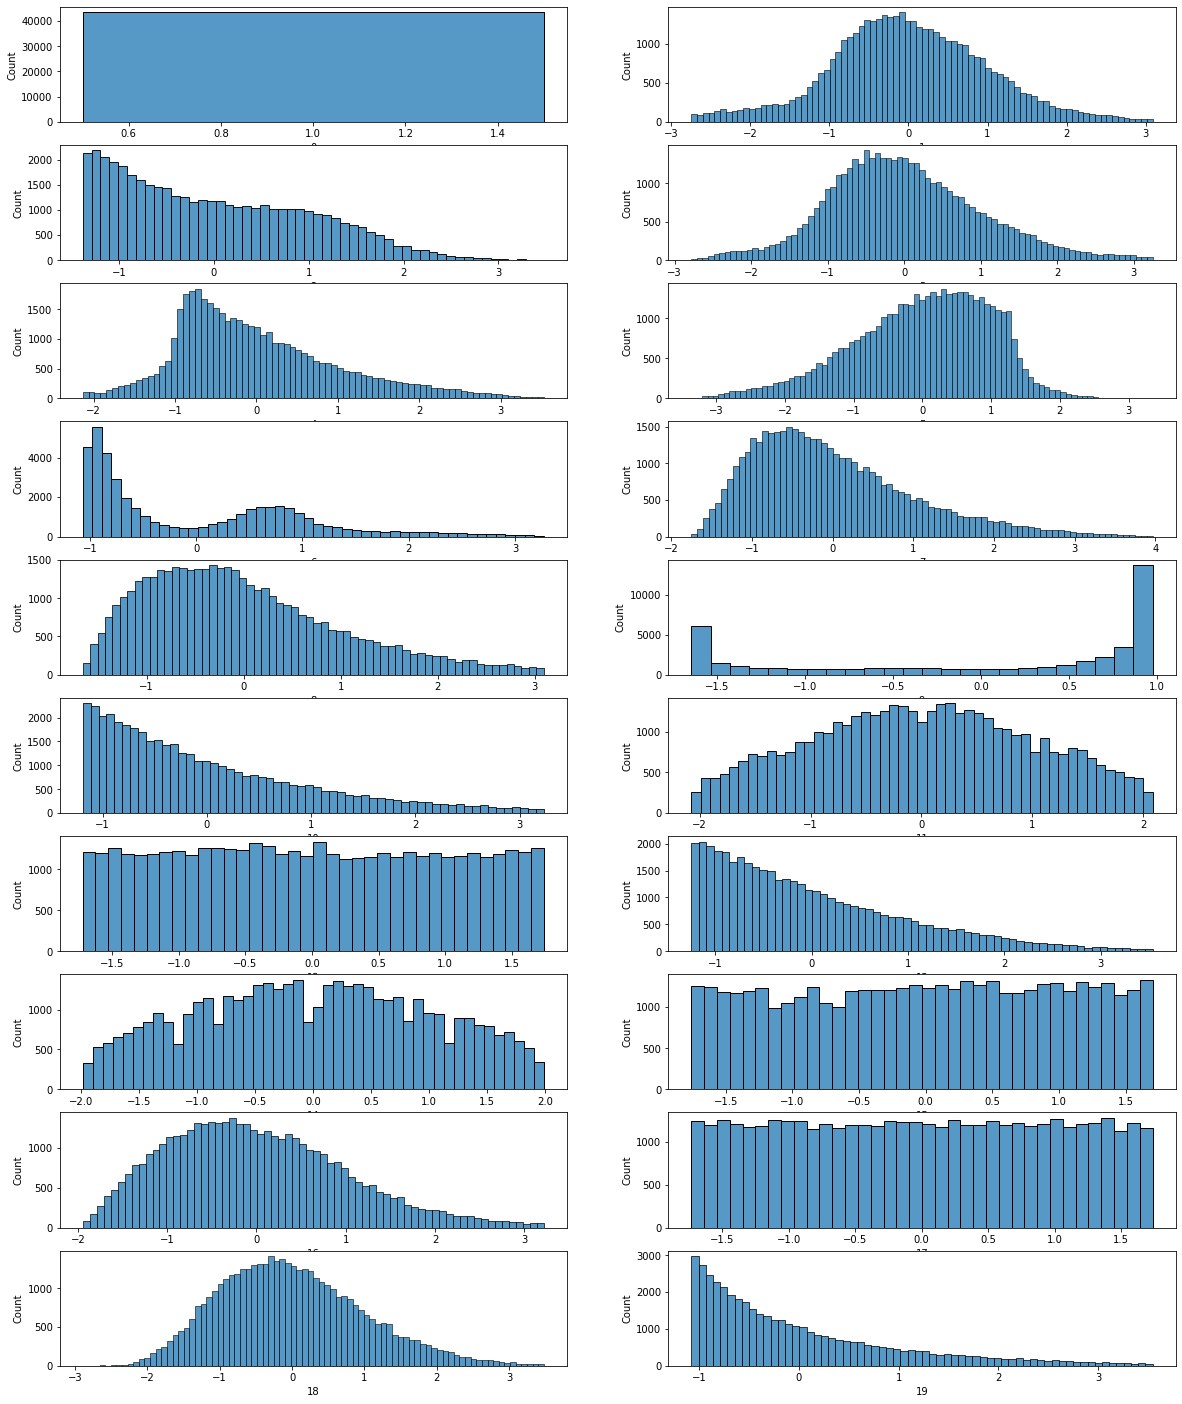

In [256]:
import pandas as pd
fig, axes = plt.subplots(10,2, figsize=(20,25))
df_col_clean = pd.DataFrame(data=X_train[1])
for i, col in enumerate(df_col_clean.columns):
    ax = axes[i // 2, i%2]
    sns.histplot(data=df_col_clean.loc[:,col], ax=ax)
fig.tight_layout()

IndexError: index 10 is out of bounds for axis 0 with size 10

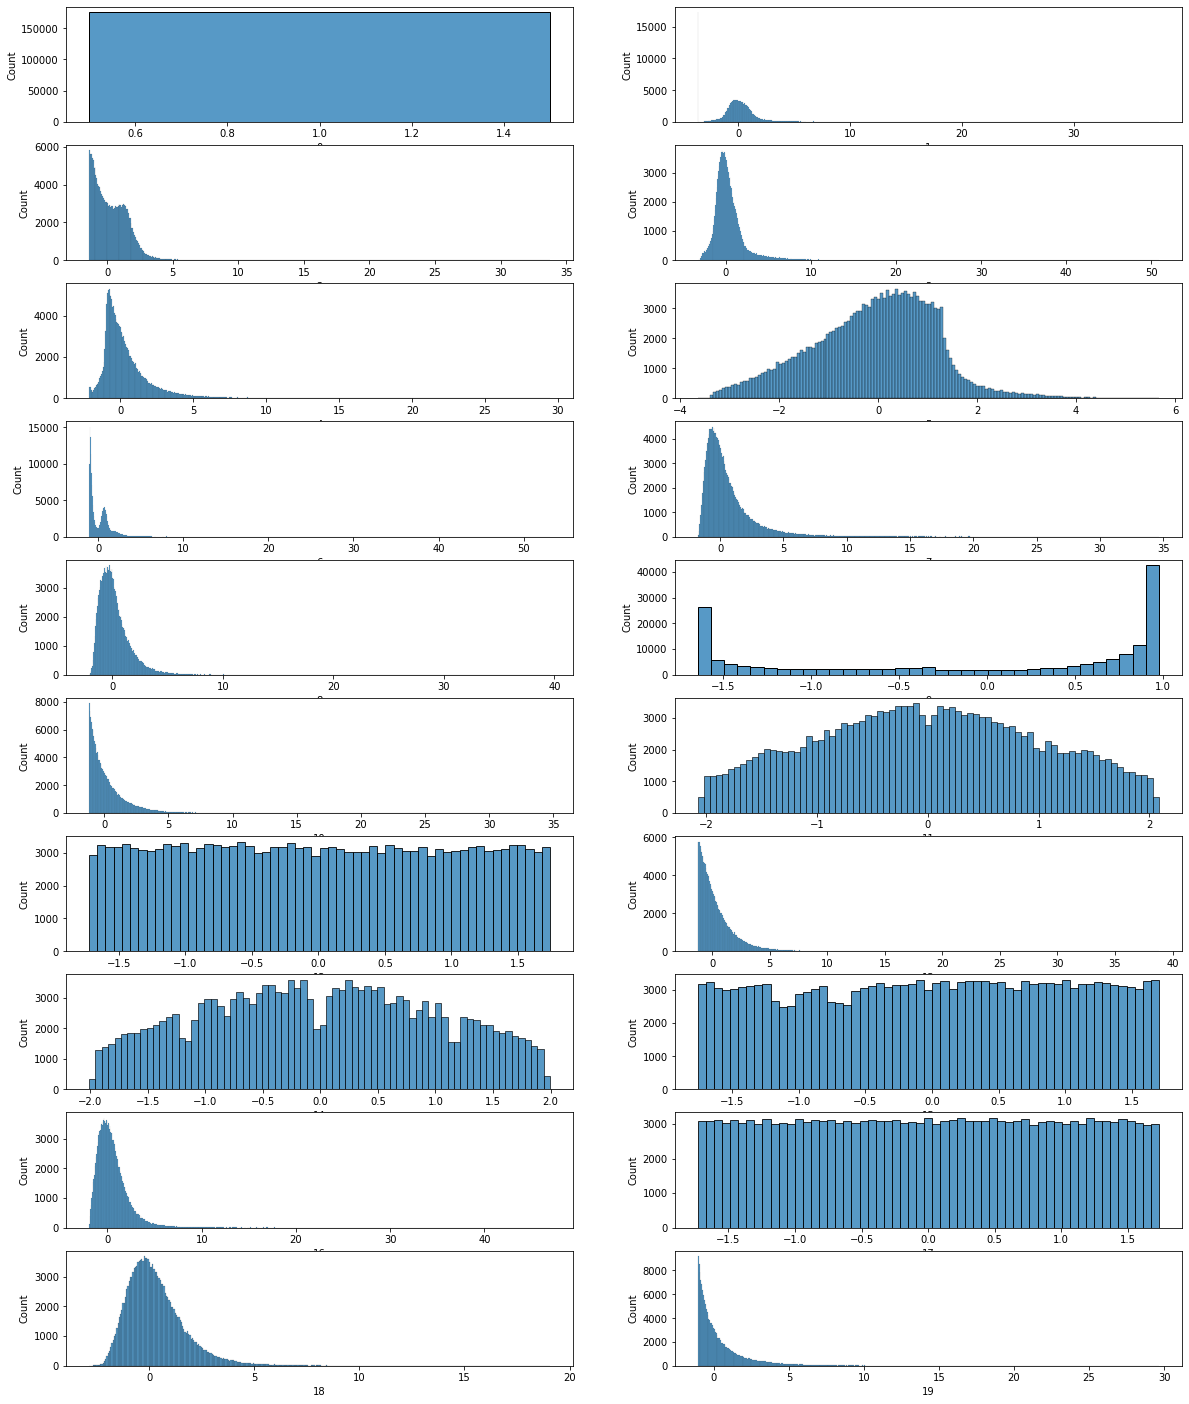

In [257]:
fig, axes = plt.subplots(10,2, figsize=(20,25))
df_col_clean = pd.DataFrame(data=X_test[1])
for i, col in enumerate(df_col_clean.columns):
    ax = axes[i // 2, i%2]
    sns.histplot(data=df_col_clean.loc[:,col], ax=ax)
fig.tight_layout()

In [249]:
DEGREE = 2

In [250]:
def fit(Y, X, IDS):
    W = []
    losses = []
    for i in range(len(Y)): 
        y_cat, tX_cat, ids_cat = Y[i], X[i], IDS[i]
        initial_w = np.zeros(len(y_cat))
        w, loss = model_data(y_cat, tX_cat, 'least_squares', initial_w=initial_w, poly_exp = DEGREE)
        W.append(w)
        losses.append(loss)
    return W

In [251]:
def prediction_by_cat(W, X, IDS):
    y_pred = np.array([])
    ids_pred = np.array([])
    for w, tX, ids in zip(W, X, IDS):
        tX_poly = build_poly_2D(tX, DEGREE)
        if False: # Only for logistic regression, we will do something nice later
            y_pred = np.c_[y_pred,predict_labels_logistic(w, tX_poly)]
        else:
            prediction = predict_labels(w, tX_poly)
            y_pred = np.concatenate((y_pred, prediction)) if len(y_pred) else prediction
        ids_pred = np.concatenate((ids_pred, ids)) if len(ids_pred) else ids
    return y_pred, ids_pred

In [260]:
def model_accuracy_by_cat(Y_train, X_train, Y_validation, X_validation, IDS):
    W = fit(Y_train, X_train, IDS)
    y_pred, ids_pred = prediction_by_cat(W, X_validation, IDS)
    return (y_pred == np.hstack(Y_validation,)).sum() / len(y_pred)

In [271]:
Y_train, X_train, IDS_train, Y_validation, X_validation, IDS_validation = clean_by_cat(y_train, tX_train, ids_train, y_validation, tX_validation, ids_validation)

In [272]:
model_accuracy_by_cat(Y_train, X_train, Y_validation, X_validation, IDS_validation)

0.80936

In [273]:
def create_by_cat_submission(Y_train, X_train, IDS_train, X_test, IDS_test):   
    W = fit(Y_train, X_train, IDS_train)
    y_pred, ids_pred = prediction_by_cat(W, X_test, IDS_test)
    OUTPUT_PATH = DATA_FOLDER + 'submission.csv'
    create_csv_submission(ids_pred, y_pred, OUTPUT_PATH)

In [274]:
create_by_cat_submission(Y_train, X_train, IDS_train, X_test, IDS_test)